# Loan Approval Prediction

#### Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("/workspaces/codespaces-jupyter/data/train.csv")
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


#### Visualize Distribution

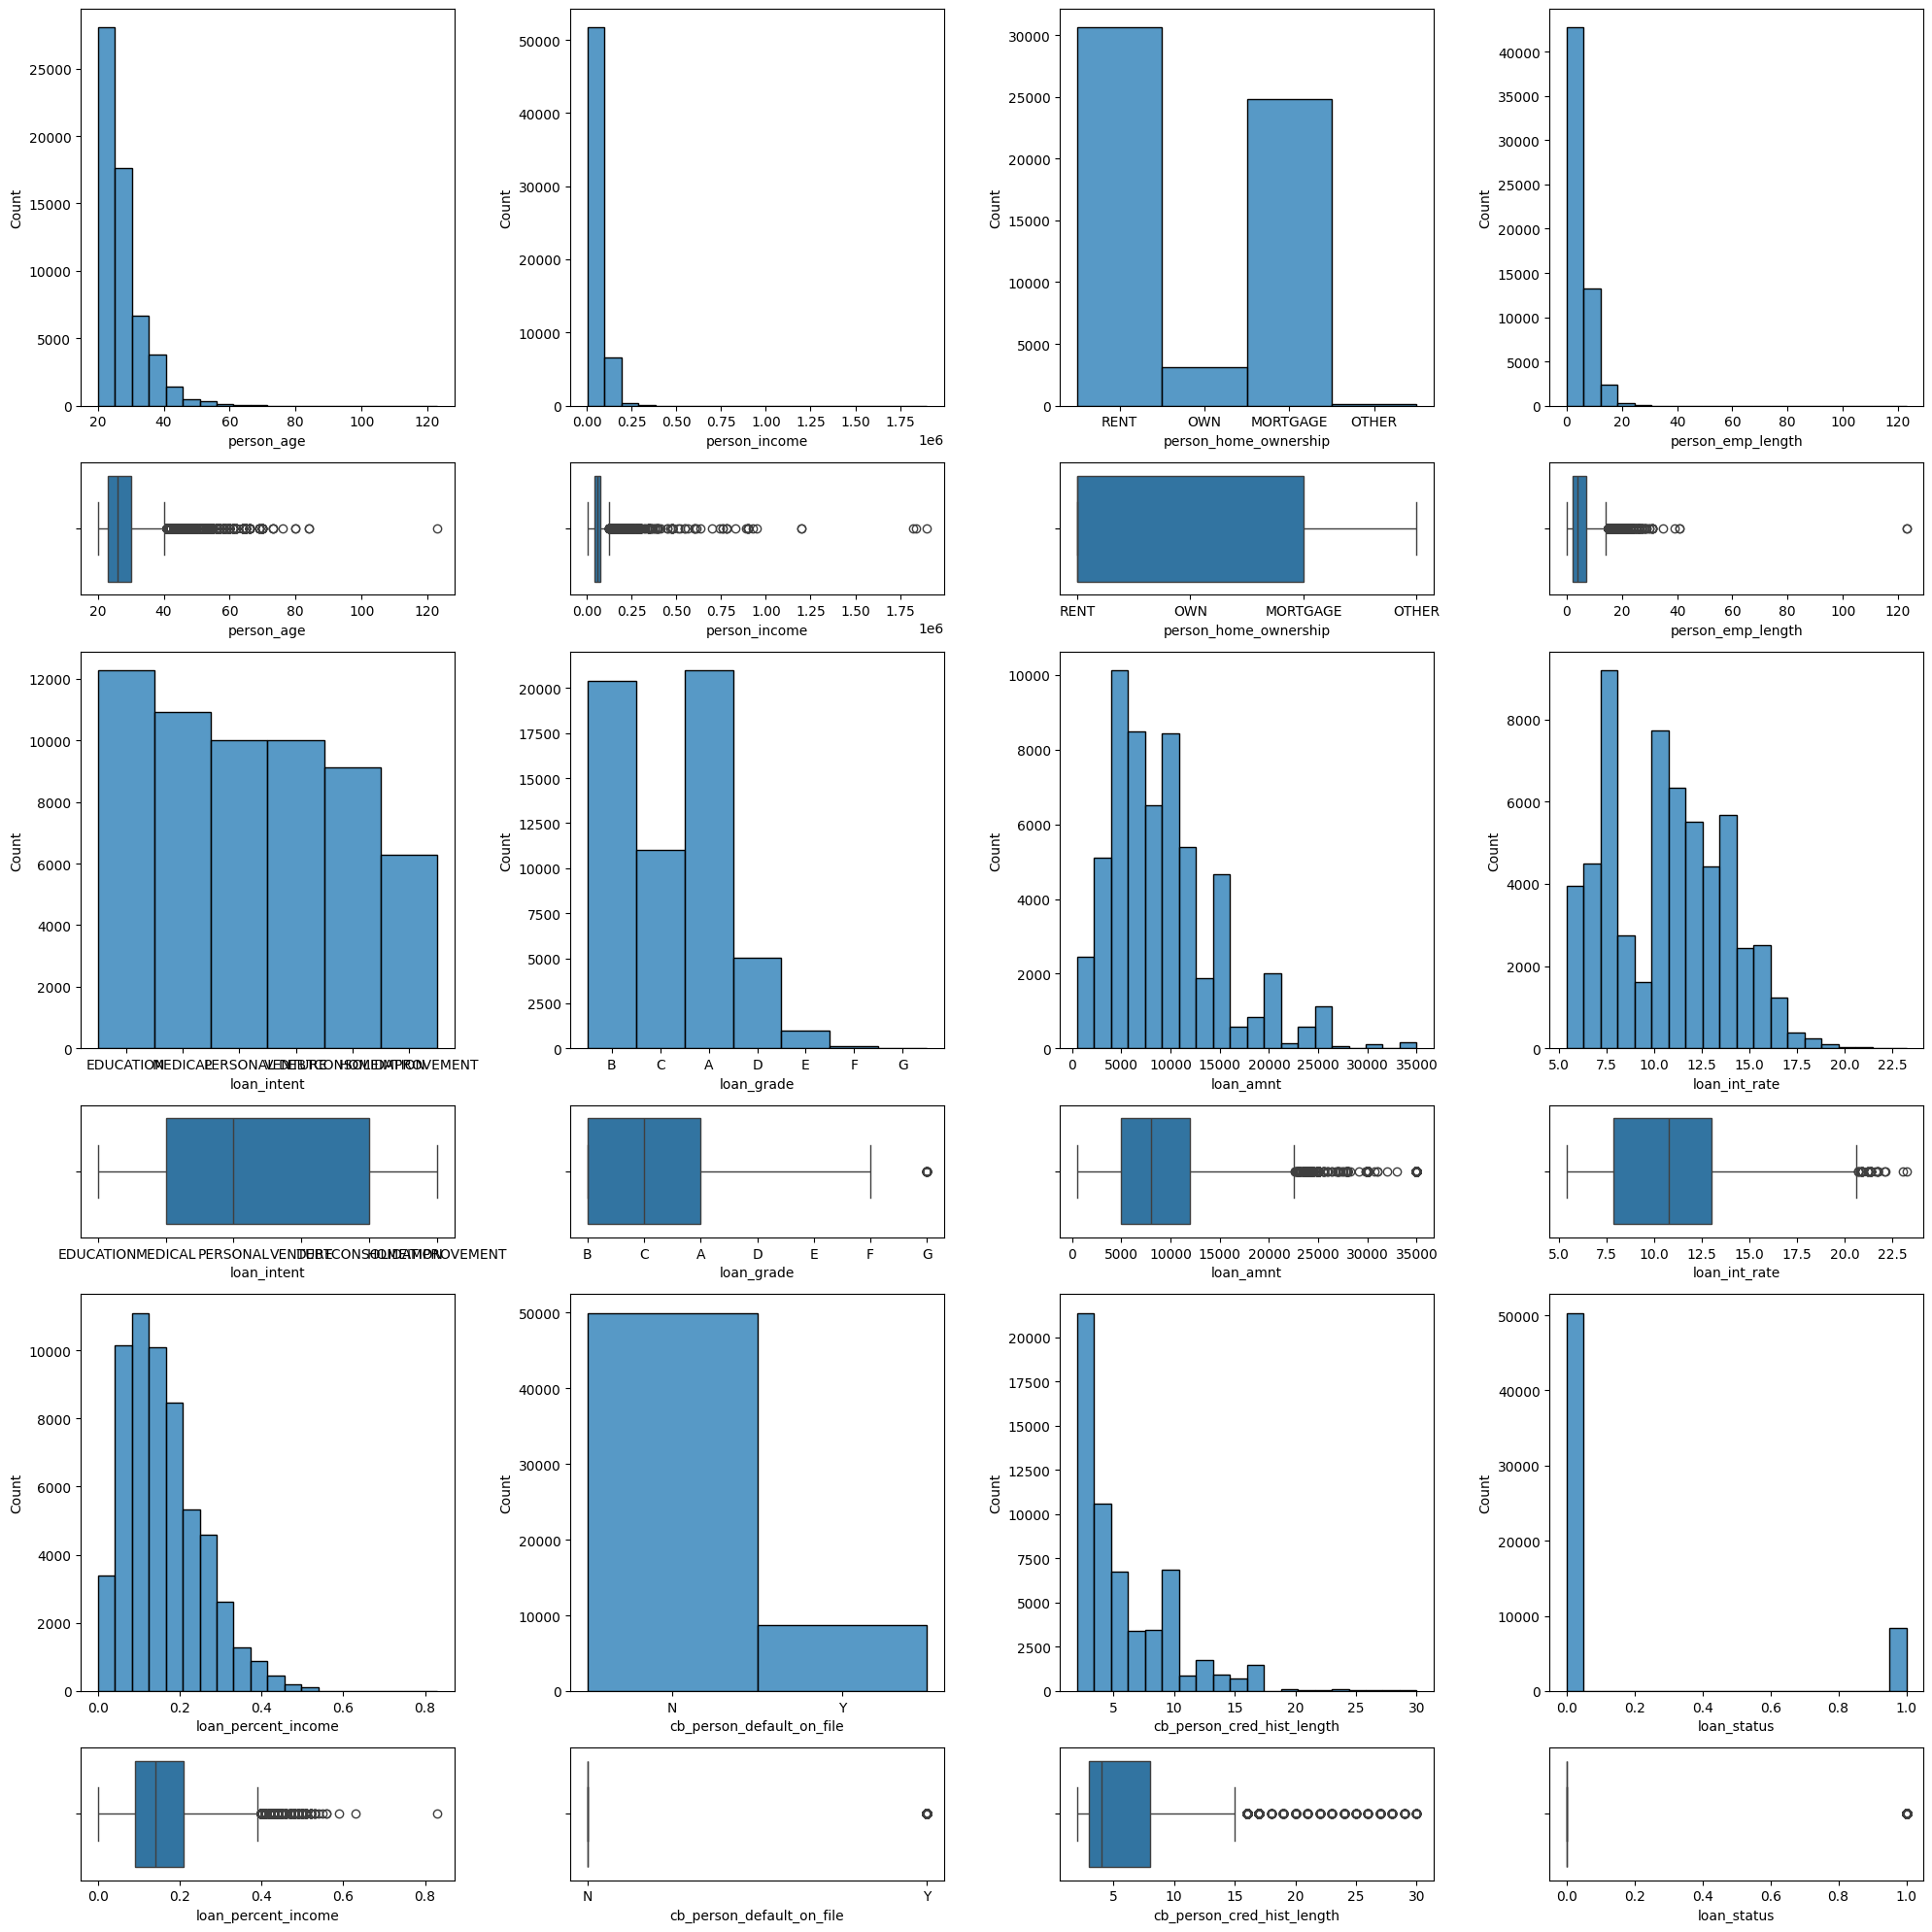

In [5]:
fig, axs = plt.subplots(6,4,gridspec_kw={"height_ratios":[3,1,3,1,3,1]}, figsize = (20,20))
for n in range(len(train_df.columns[1:])):
    sns.histplot(train_df, x = train_df.columns[n+1], ax = axs.flat[n+(n//4)*4], bins=20)
    sns.boxplot(train_df, x = train_df.columns[n+1],ax = axs.flat[n+4+(n//4)*4])
plt.tight_layout()


"Paired" box-plots for comparison of distribution of features for respective category of target

In [6]:
numericals = [x for x in train_df.columns if train_df[x].dtype in ['float64','int64'] and x != 'id']

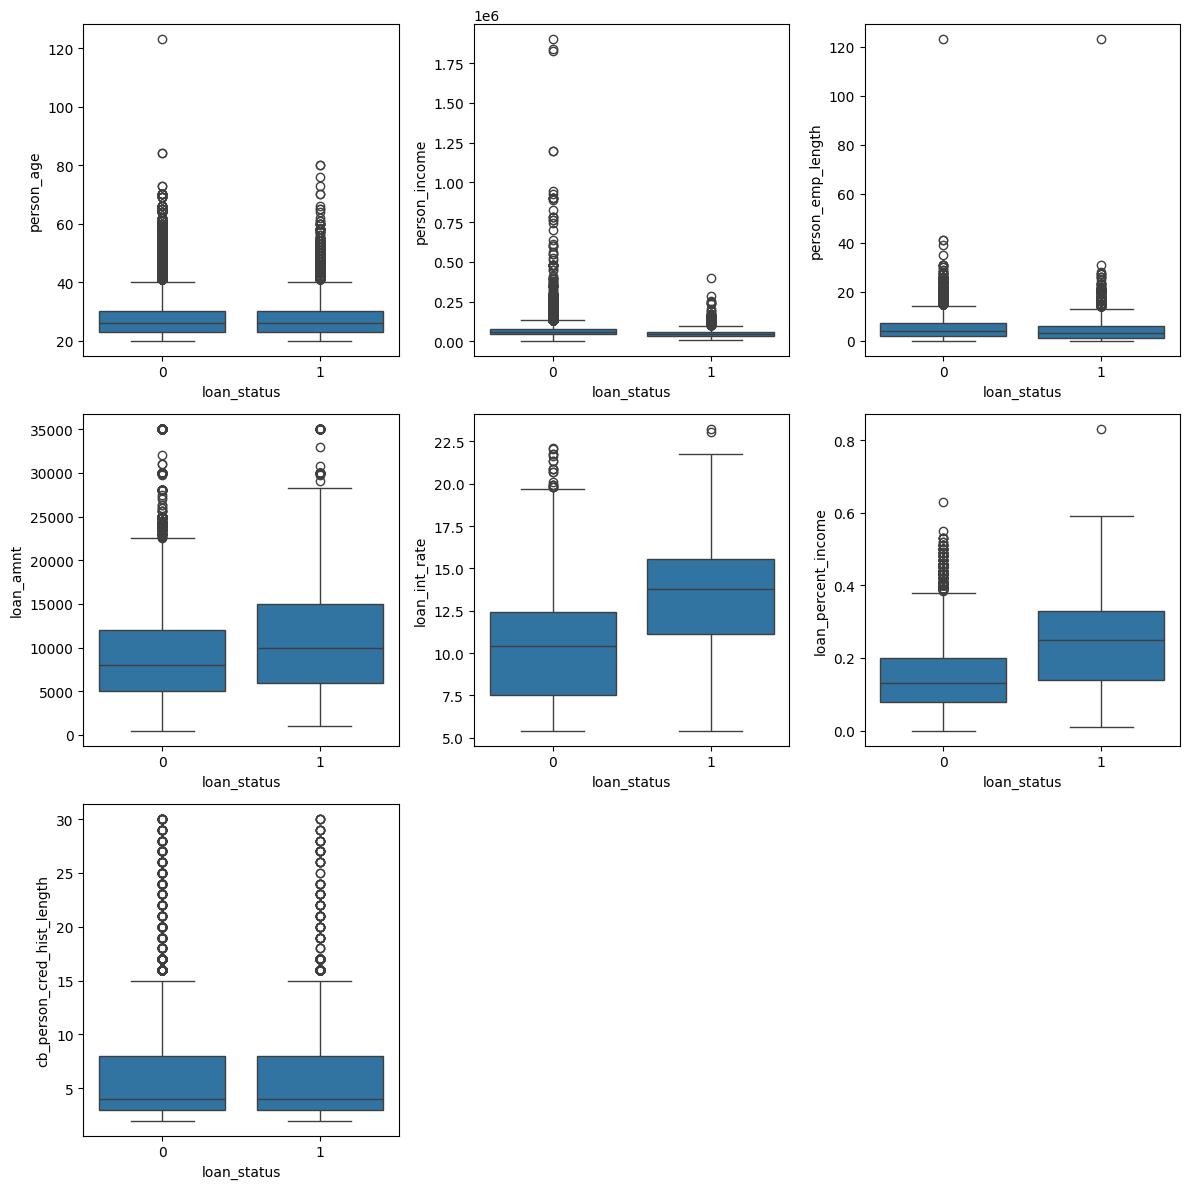

In [7]:
plt.figure(figsize=(12,12))
for n, c in enumerate(numericals[:-1]):
    plt.subplot(3,3,n+1)
    sns.boxplot(train_df, y = c, x = 'loan_status')
    plt.tight_layout()    

The most obvious differnetiators in approval seem to be 'loan_int_rate' and 'loan_percent_income' with loan amount also having perhaps a slight impact.

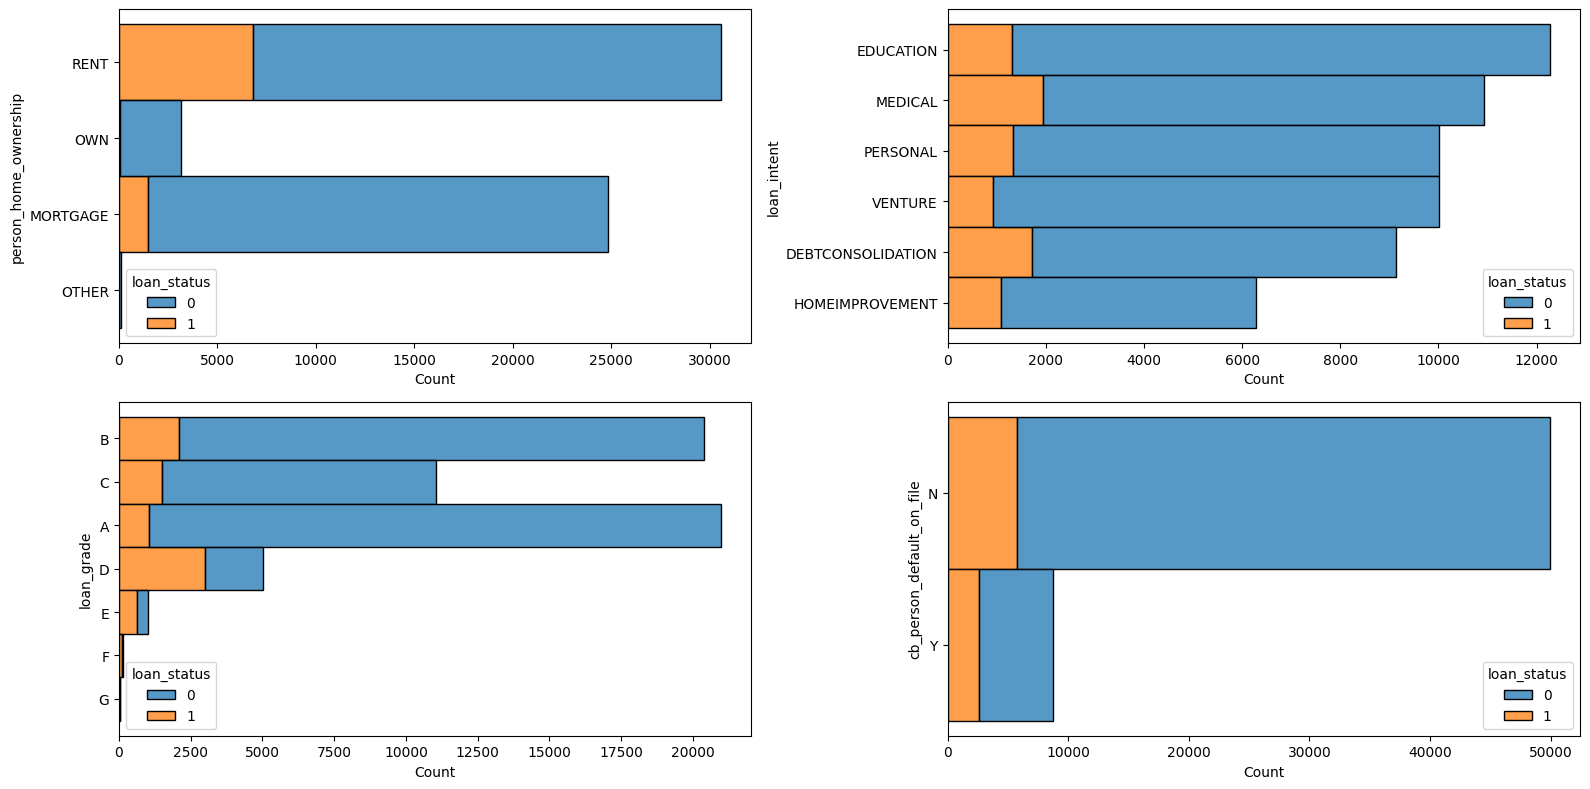

In [8]:
categoricals = [x for x in train_df.columns if train_df[x].dtype == 'object']
plt.figure(figsize=(16,8))
for n, c in enumerate(categoricals):
    plt.subplot(2,2,n+1)
    sns.histplot(train_df, y = c, hue= 'loan_status', multiple='stack' , stat = 'count')
    plt.tight_layout()    



Let's compare the percetages of approvals for each category of respective features to better comprehend any potential significance of the feature for loan approval.

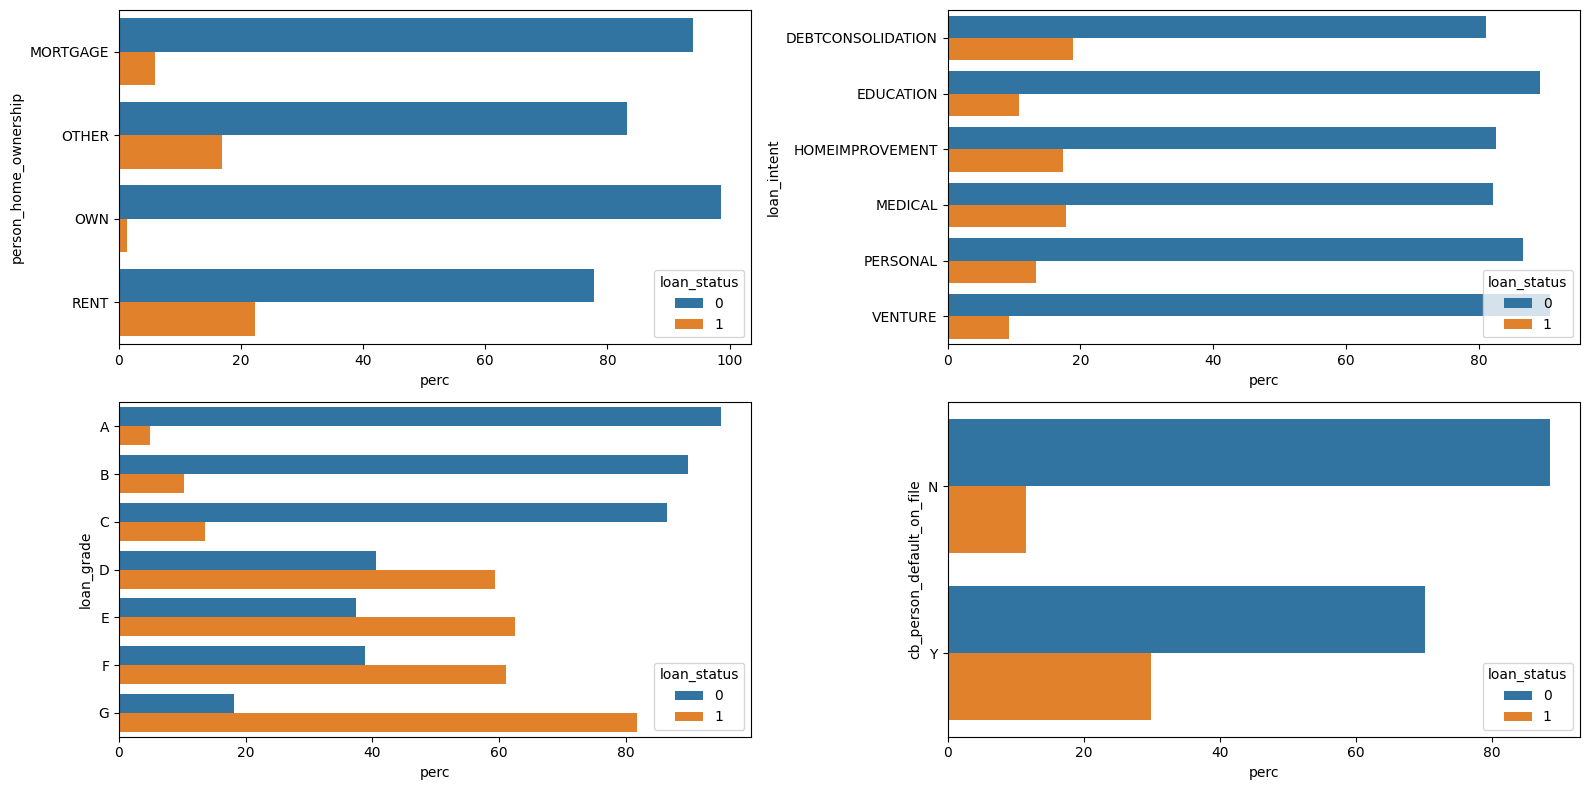

In [9]:
plt.figure(figsize=(16,8))
for n, c in enumerate(categoricals):
    grp = train_df[[c,'loan_status']].groupby([c,'loan_status']).size().reset_index().rename(columns = {0:'size'})
    grp['perc'] = grp.apply(lambda row: row['size']/np.sum(grp[grp[c]==row[c]]['size'])*100, axis = 1)
    plt.subplot(2,2,n+1)
    sns.barplot(grp, y = c, x = 'perc', hue= 'loan_status')
    plt.tight_layout()    

'Loan grade' defeinitely has an influence on approval. ' 'person_home_ownership' also has some influence on approval.

Ideally now would be a good time to check for any anomalies / outlierss based on common sense / domain logic like checking employment_length to be less than person_age etc. But since the dataset is synthetic, removing such anomalies will only result in perfornmance reduction of preditive models we create, as all of the data has to be considered as ground truth even if it deviates from logic. So we are skipping this step here!

#### Checking correlation

First observe correlation among the continuous variables using Pearson's correlation coefficient. But before that we need to scale the data.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(train_df[numericals[:-1]])
scaled_continuous = pd.DataFrame(scaled_continuous, columns = scaler.get_feature_names_out(), index = train_df.index)

In [ ]:
scaled_continuous

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298
...,...,...,...,...,...,...,...
58640,1.068949,1.475156,0.075506,2.836651,1.737297,0.553626,1.039036
58641,0.074446,-0.929223,-1.187200,0.140632,0.676227,2.080493,0.542655
58642,-0.754307,-0.528494,0.580588,-0.434518,1.753773,-0.100746,-0.946489
58643,-0.920057,-0.897587,-0.682117,-0.758041,-0.585854,0.117378,-0.698298


<Axes: >

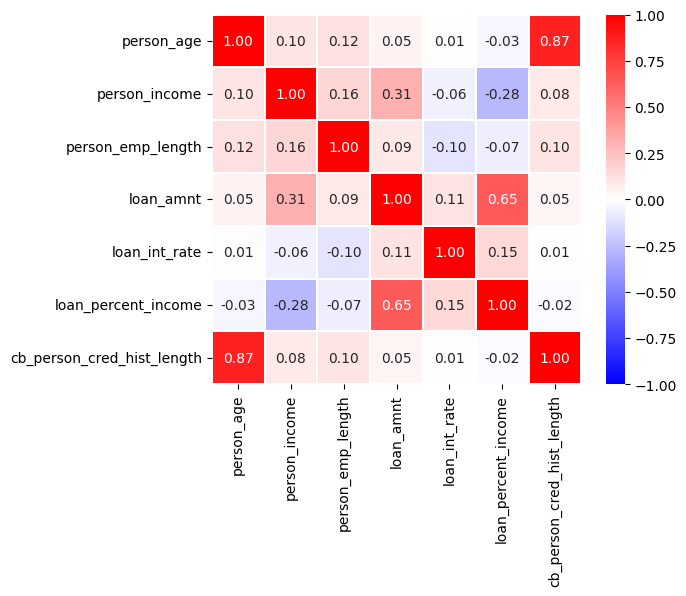

In [12]:
sns.heatmap(scaled_continuous.corr(), vmin = -1, vmax = 1, cmap= 'bwr', square=True, linewidth= 0.2, annot = True, fmt = '.2f')

Well 'cb_person_cred_hist_length' is correalted high enough with 'person_age', naturally. Potentially we can exclude the 'cb_person_cred_hist_length' column from input features for models.

To check correlation among the categorical variables, we can use Cramer's V.

In [13]:
from scipy.stats import chi2_contingency

def cramers_V(df):
    feats = df.columns
    num_features = len(df.columns)
    V_mat = np.zeros((num_features, num_features))
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            if i != j:
                contingency_table = pd.crosstab(df[feats[i]], df[feats[j]])
                chi_stat, _, _, _  = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                r = contingency_table.shape[0]
                c = contingency_table.shape[1]
                V_mat[i][j] = (chi_stat/(n*min(c-1,r-1)))**0.5
            else:
                V_mat[i][j] = 1
    
    return V_mat

cram_corr = cramers_V(train_df[categoricals])

In [14]:
cram_corr = pd.DataFrame(cram_corr, columns=categoricals, index = categoricals)

<Axes: >

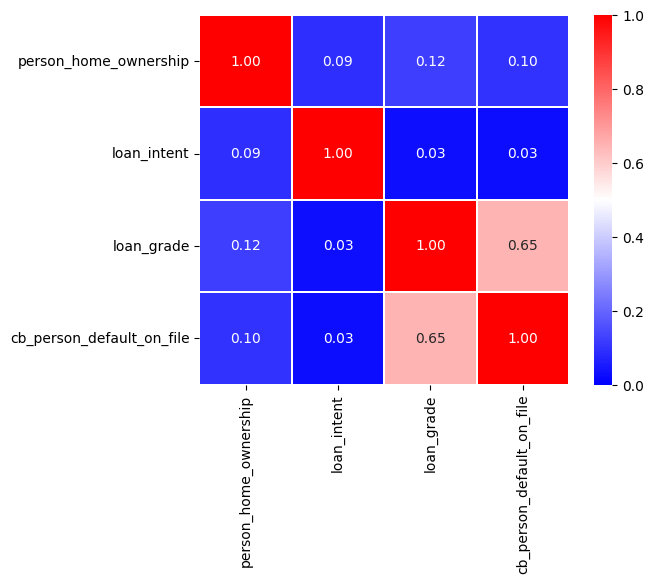

In [15]:
sns.heatmap(cram_corr, vmin = 0, vmax = 1, cmap= 'bwr', square=True, linewidth= 0.2, annot = True, fmt = '.2f')

Here we can see that 'loan_grade' has a strong assocaiation with 'cb_person_default_on_file' due to the Cramers V value > 0.5. This makes sense, low grade loans could be loans associated to customers with high chances of default and hence have low approval rates.

#### Preprocessing

In [16]:
categoricals

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

Encode categorical variables:

    - 'person_home_ownership: one-hot
    - 'loan_intent' - one-hot
    - 'loan grade' - ordinal
    - 'cb_person_default_on_file' - dummy


In [17]:
from sklearn.preprocessing import OrdinalEncoder

ordinaler = OrdinalEncoder()
loan_grade_ord = ordinaler.fit_transform(train_df[['loan_grade']])
loan_grade_ord = pd.DataFrame(loan_grade_ord,columns = ['loan_grade'], index = train_df.index)

In [18]:
from sklearn.preprocessing import OneHotEncoder

oher = OneHotEncoder(sparse_output=False)
oh_encoded = oher.fit_transform(train_df[['person_home_ownership','loan_intent']])
oh_encoded = pd.DataFrame(oh_encoded,columns = oher.get_feature_names_out(), index = train_df.index)
oh_encoded

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
58640,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58641,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
58642,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
58643,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


If 'cb_person_default_on_file' is to be used, it first needs to be split into 2 dummy columns, out of which one column would suffice, since it is only a binary feature. Most likely this feature won't be needed for modelling.

In [19]:
defaulter = pd.get_dummies(train_df['cb_person_default_on_file'])
defaulter = defaulter['Y']
defaulter

0        False
1        False
2        False
3        False
4        False
         ...  
58640     True
58641    False
58642    False
58643    False
58644    False
Name: Y, Length: 58645, dtype: bool

In [20]:
df = pd.concat([scaled_continuous,loan_grade_ord,oh_encoded,defaulter, train_df['loan_status']] ,axis = 1)
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,Y,loan_status
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,False,0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,False,0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,False,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      58645 non-null  float64
 1   person_income                   58645 non-null  float64
 2   person_emp_length               58645 non-null  float64
 3   loan_amnt                       58645 non-null  float64
 4   loan_int_rate                   58645 non-null  float64
 5   loan_percent_income             58645 non-null  float64
 6   cb_person_cred_hist_length      58645 non-null  float64
 7   loan_grade                      58645 non-null  float64
 8   person_home_ownership_MORTGAGE  58645 non-null  float64
 9   person_home_ownership_OTHER     58645 non-null  float64
 10  person_home_ownership_OWN       58645 non-null  float64
 11  person_home_ownership_RENT      58645 non-null  float64
 12  loan_intent_DEBTCONSOLIDATION   

#### Logistic Regression

In [22]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_grade', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'Y', 'loan_status'],
      dtype='object')

In [23]:
feats = list(df.columns)
feats.remove('cb_person_cred_hist_length')
feats.remove('Y')

df1 = df.copy()
df1 = df1[feats]

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

from sklearn.model_selection import train_test_split
y = df1.pop('loan_status')
X = df1

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
fitted_lr = log_reg.fit(X_train, y_train)

y_pred_tr = fitted_lr.predict(X_train)
y_pred_te = fitted_lr.predict(X_test)



In [24]:
accuracy_tr = sum(y_pred_tr == y_train)/len(y_train)
accuracy_te = sum(y_pred_te == y_test)/len(y_test)

print(f'Accuracy of prediction on training set: {accuracy_tr}')
print(f'Accuracy of prediction on test set: {accuracy_te}')

Accuracy of prediction on training set: 0.9015048171199591
Accuracy of prediction on test set: 0.8992241452809276


Accuracies are off the charts!! Accuracy is however a very misleading metric. A naive model that rejects all loan applications could probably have similar metrics. We need to deep dive into other key metrics first!

In [25]:
tp_tr = sum((y_pred_tr == 1) & (y_train == 1))
tn_tr = sum((y_pred_tr == 0) & (y_train == 0))
fp_tr = sum((y_pred_tr == 1) & (y_train == 0))
fn_tr = sum((y_pred_tr == 0) & (y_train == 1))

precision_tr = tp_tr/(tp_tr+fp_tr)
recall_tr = tp_tr/(tp_tr+fn_tr)
specificity_tr = tn_tr/(tn_tr+fp_tr)
f1_score_tr = 2*precision_tr*recall_tr/(precision_tr+recall_tr)

print('----- Performance metrics - Training ------')
print(f'precision: {precision_tr}')
print(f'recall: {recall_tr}')
print(f'specificity: {specificity_tr}')
print(f'f1_score: {f1_score_tr}')

----- Performance metrics - Training ------
precision: 0.7478468899521531
recall: 0.46705513222770056
specificity: 0.9737960868160008
f1_score: 0.5750022992734296


In [26]:
tp_te = sum((y_pred_te == 1) & (y_test == 1))
tn_te = sum((y_pred_te == 0) & (y_test == 0))
fp_te = sum((y_pred_te == 1) & (y_test == 0))
fn_te = sum((y_pred_te == 0) & (y_test == 1))

precision_te = tp_te/(tp_te+fp_te)
recall_te = tp_te/(tp_te+fn_te)
specificity_te = tn_te/(tn_te+fp_te)
f1_score_te = 2*precision_te*recall_te/(precision_te+recall_te)

print('----- Performance metrics - test ------')
print(f'precision: {precision_te}')
print(f'recall: {recall_te}')
print(f'specificity: {specificity_te}')
print(f'f1_score: {f1_score_te}')

----- Performance metrics - test ------
precision: 0.7335299901671584
recall: 0.45021122510561257
specificity: 0.9730937251787133
f1_score: 0.5579655946148093


#### Balacing the unbalanced dataset

Since the number of 0s is far higher than the 1s in 'loan_status' column ie. our target, the dataset is unbalanced and without accounting for it any model that can be impacted by data imbalance can skew towards making predictions which are the dominant target class label, 0 in this case. Fortunately Logistic Regression has class-Weighting as a feature, which can help offset the imbalance in dataset. let's see if performance can be improved by balancing the dataset parametrically through the class-weight parameter in logistic regression


In [27]:
log_reg_bal = LogisticRegression(class_weight='balanced')
fitted_l2 = log_reg_bal.fit(X_train, y_train)

y_pred_tr = fitted_l2.predict(X_train)
y_pred_te = fitted_l2.predict(X_test)

accuracy_tr = sum(y_pred_tr == y_train)/len(y_train)
accuracy_te = sum(y_pred_te == y_test)/len(y_test)

print(f'Accuracy of prediction on training set: {accuracy_tr}')
print(f'Accuracy of prediction on test set: {accuracy_te}')

# Training
tp_tr = sum((y_pred_tr == 1) & (y_train == 1))
tn_tr = sum((y_pred_tr == 0) & (y_train == 0))
fp_tr = sum((y_pred_tr == 1) & (y_train == 0))
fn_tr = sum((y_pred_tr == 0) & (y_train == 1))

precision_tr = tp_tr/(tp_tr+fp_tr)
recall_tr = tp_tr/(tp_tr+fn_tr)
specificity_tr = tn_tr/(tn_tr+fp_tr)
f1_score_tr = 2*precision_tr*recall_tr/(precision_tr+recall_tr)

print('----- Performance metrics - Training ------')
print(f'precision: {precision_tr}')
print(f'recall: {recall_tr}')
print(f'specificity: {specificity_tr}')
print(f'f1_score: {f1_score_tr}')

# Testing
tp_te = sum((y_pred_te == 1) & (y_test == 1))
tn_te = sum((y_pred_te == 0) & (y_test == 0))
fp_te = sum((y_pred_te == 1) & (y_test == 0))
fn_te = sum((y_pred_te == 0) & (y_test == 1))

precision_te = tp_te/(tp_te+fp_te)
recall_te = tp_te/(tp_te+fn_te)
specificity_te = tn_te/(tn_te+fp_te)
f1_score_te = 2*precision_te*recall_te/(precision_te+recall_te)

print('----- Performance metrics - test ------')
print(f'precision: {precision_te}')
print(f'recall: {recall_te}')
print(f'specificity: {specificity_te}')
print(f'f1_score: {f1_score_te}')

Accuracy of prediction on training set: 0.8152442663483673
Accuracy of prediction on test set: 0.8117486571745247
----- Performance metrics - Training ------
precision: 0.42428889059265507
recall: 0.8268340056775736
specificity: 0.8133157646122865
f1_score: 0.560802594244021
----- Performance metrics - test ------
precision: 0.41478502938447265
recall: 0.8092939046469523
specificity: 0.812152501985703
f1_score: 0.5484662576687117


Precision has decreased while recall has improved with a reduction in overall accuracy

Let's see if changing the threshold values of predicted class probabilites to determine 1 or 0 class yields better results

({'0': {'1e-10': 0.1426592207349305,
   '0.0020040081158316635': 0.14866996333873306,
   '0.004008016131663327': 0.15587432858726233,
   '0.00601202414749499': 0.1616079802199676,
   '0.008016032163326654': 0.1671071702617444,
   '0.010020040179158318': 0.17339500383664422,
   '0.01202404819498998': 0.18047148094466706,
   '0.014028056210821644': 0.18690851735015773,
   '0.01603206422665331': 0.1950507289624009,
   '0.018036072242484973': 0.20285190553329355,
   '0.020040080258316637': 0.21110069059595873,
   '0.0220440882741483': 0.21951999317929918,
   '0.02404809628997996': 0.22830164549407453,
   '0.026052104305811626': 0.23697672435842781,
   '0.02805611232164329': 0.24435160712763238,
   '0.030060120337474953': 0.25230198652911584,
   '0.03206412835330662': 0.259762128058658,
   '0.03406813636913828': 0.2673075283485378,
   '0.036072144384969945': 0.2751939636797681,
   '0.03807615240080161': 0.28290988149032315,
   '0.04008016041663327': 0.28992241452809275,
   '0.04208416843246

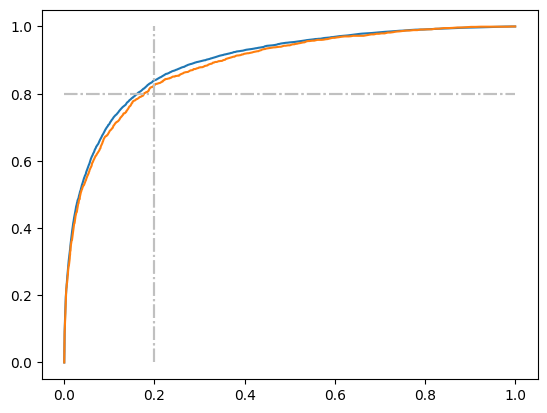

In [28]:
y_prob_tr = fitted_l2.predict_proba(X_train)
y_prob_te = fitted_l2.predict_proba(X_test)

from numpy.typing import ArrayLike

def roc_log_reg(y_prob_array: ArrayLike,y_array: ArrayLike ,thresholds:int = 500):

    #plot ROC for different prob thresholds
    accuracies = {}
    precisions = {}
    recalls = {}
    specificities = {}
    f1_scores = {}
    
    for i in range(len(y_array)):
        y = y_array[i]
        y_prob = y_prob_array[i]
        
        accuracies[str(i)] = {}
        precisions[str(i)] = {}
        recalls[str(i)] = {}
        specificities[str(i)] = {}
        f1_scores[str(i)] = {}
        
        for n in np.linspace(0.0000000001,1,thresholds):
            y_pred = y_prob[:,1]>n
            accuracy = sum(y_pred == y)/len(y)
            accuracies[str(i)][str(n)] = accuracy

            tp = sum((y_pred == 1) & (y== 1))
            tn = sum((y_pred == 0) & (y == 0))
            fp = sum((y_pred == 1) & (y == 0))
            fn = sum((y_pred == 0) & (y == 1))

            precision = tp/(tp+fp) if (tp + fp) > 0 else 0.0
            recall = tp/(tp+fn) if (tp+fn) > 0 else 0.0
            specificity = tn/(tn+fp) if (tn+fp) > 0 else 0.0
            f1_score = 2*precision*recall/(precision+recall) if (precision+recall) > 0 else 0.0
            
            precisions[str(i)][str(n)] = precision
            recalls[str(i)][str(n)] = recall
            specificities[str(i)][str(n)] = specificity
            f1_scores[str(i)][str(n)] = f1_score
            
        
    fprs = {str(i): {k:1-v for k,v in specificities[str(i)].items()} for i in specificities}
    for i in range(len(fprs.items())):
        sns.lineplot(x = fprs[str(i)].values(), y = recalls[str(i)].values())
        plt.vlines([0.2], ymin = 0, ymax= 1, linestyle= '-.', color = 'silver')
        plt.hlines([0.8], xmin = 0, xmax= 1, linestyle= '-.', color = 'silver')

    return accuracies, precisions, recalls, specificities, fprs, f1_scores

roc_log_reg([y_prob_tr, y_prob_te],[ y_train,y_test])

2024-10-08 09:31:27.752782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 09:31:27.856563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 09:31:27.880433: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 09:31:28.037728: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 09:31:41.175194: W tensorflow/compiler/tf2

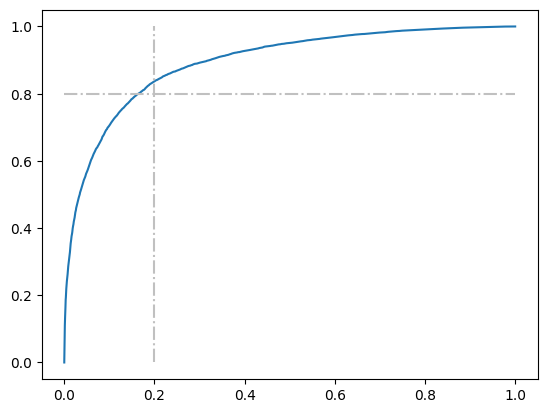

In [29]:
fitted_l3 = log_reg_bal.fit(X,y)
y_prob_tr = fitted_l3.predict_proba(X)

accuracies, precisions, recalls, specificities, fprs, f1_scores = roc_log_reg([y_prob_tr],[y])

#### Hypothesis testing for identifying significant features

Let's check summary table of the logistic regression to determine significant features


In [30]:
import statsmodels.api as sm

logit_m = sm.Logit(y_train, X_train.drop(columns = ['person_home_ownership_OTHER','loan_intent_HOMEIMPROVEMENT']))
fitted_logit_m = logit_m.fit()
fitted_logit_m.summary()

Optimization terminated successfully.
         Current function value: 0.252820
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                46916
Model:                          Logit   Df Residuals:                    46901
Method:                           MLE   Df Model:                           14
Date:                Tue, 08 Oct 2024   Pseudo R-squ.:                  0.3830
Time:                        09:31:43   Log-Likelihood:                -11861.
converged:                       True   LL-Null:                       -19224.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
person_age                         0.0207      0.017      1.227      0.220      -0.012       0.054
person_income                     -0.2348      0.058     -4.047      0.000      -0.349      -0.121
person_emp_length                 -0.0679      0.019     -3.535      0.000      -0.106      -0.030
loan_amnt                         -0.3591      0.043     -8.401      0.000      -0.443      -0.275
loan_int_rate                     -0.0969      0.050     -1.939      0.052      -0.195       0.001
loan_percent_income                1.2686      0.039     32.927      0.000       1.193       1.344
loan_grade                         1.1642      0.043     26.930      0.000       1.079       1.249
person_home_ownership_MORTGAGE    -3.8780      0.075    -51.451      0.000      -4.026      -3.730
person_home_ownership_OWN         -6.7558      0.209    -32.313      0.000      -7.166      -6.346
person_home_ownership_RENT        -2.8869      0.070    -41.488      0.000      -3.023      -2.751
loan_intent_DEBTCONSOLIDATION     -0.2032      0.062     -3.297      0.001      -0.324      -0.082
loan_intent_EDUCATION             -1.0782      0.063    -16.997      0.000      -1.203      -0.954
loan_intent_MEDICAL               -0.4722      0.060     -7.818      0.000      -0.591      -0.354
loan_intent_PERSONAL              -0.7801      0.064    -12.238      0.000      -0.905      -0.655
loan_intent_VENTURE               -1.2707      0.068    -18.588      0.000      -1.405      -1.137
==================================================================================================
"""

In [31]:
import statsmodels.api as sm

logit_m = sm.Logit(y_train, X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age'])) #'person_age'
fitted_logit_m = logit_m.fit()
fitted_logit_m.summary()

Optimization terminated successfully.
         Current function value: 0.252877
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                46916
Model:                          Logit   Df Residuals:                    46903
Method:                           MLE   Df Model:                           12
Date:                Tue, 08 Oct 2024   Pseudo R-squ.:                  0.3829
Time:                        09:31:44   Log-Likelihood:                -11864.
converged:                       True   LL-Null:                       -19224.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
person_income                     -0.2292      0.058     -3.963      0.000      -0.343      -0.116
person_emp_length                 -0.0666      0.019     -3.468      0.001      -0.104      -0.029
loan_amnt                         -0.3612      0.043     -8.471      0.000      -0.445      -0.278
loan_percent_income                1.2705      0.038     33.024      0.000       1.195       1.346
loan_grade                         1.0876      0.017     64.552      0.000       1.055       1.121
person_home_ownership_MORTGAGE    -3.7966      0.064    -59.585      0.000      -3.921      -3.672
person_home_ownership_OWN         -6.6713      0.205    -32.607      0.000      -7.072      -6.270
person_home_ownership_RENT        -2.8103      0.058    -48.052      0.000      -2.925      -2.696
loan_intent_DEBTCONSOLIDATION     -0.2079      0.061     -3.383      0.001      -0.328      -0.087
loan_intent_EDUCATION             -1.0864      0.063    -17.263      0.000      -1.210      -0.963
loan_intent_MEDICAL               -0.4734      0.060     -7.848      0.000      -0.592      -0.355
loan_intent_PERSONAL              -0.7807      0.064    -12.257      0.000      -0.905      -0.656
loan_intent_VENTURE               -1.2743      0.068    -18.692      0.000      -1.408      -1.141
==================================================================================================
"""

In [32]:
y_pred_logit = fitted_logit_m.predict(X_test.drop(columns = ['person_home_ownership_OTHER','person_age','loan_int_rate','loan_intent_HOMEIMPROVEMENT'])) #'person_age'

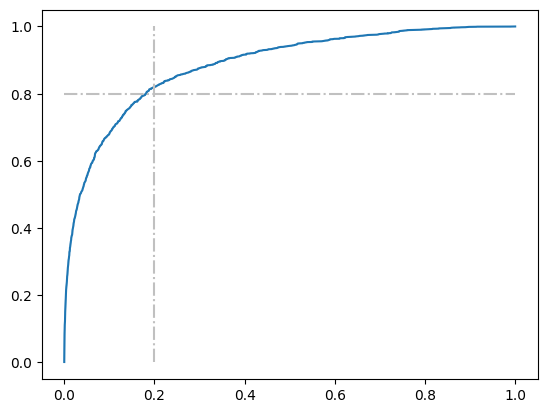

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

fprs_logit, tprs_logit, thresholds_logit =  roc_curve(y_test, y_pred_logit)

sns.lineplot(x = fprs_logit, y = tprs_logit)
plt.vlines([0.2], ymin = 0, ymax= 1, linestyle= '-.', color = 'silver')
plt.hlines([0.8], xmin = 0, xmax= 1, linestyle= '-.', color = 'silver')

In [34]:
{k:v for k,v in list(fprs['0'].items()) if v<=0.205 and v>0.195}

{'0.4749498998521043': 0.20405606919176855,
 '0.4769539078679359': 0.20260463266726314,
 '0.47895791588376757': 0.201630380753554,
 '0.48096192389959924': 0.20011929615269908,
 '0.4829659319154309': 0.1988666865493588,
 '0.4849699399312626': 0.1974947807933194,
 '0.48697394794709425': 0.1961825231136296}

In [35]:
{k:v for k,v in list(recalls['0'].items()) if v>=0.81 and v<0.85}

{'0.4569138277096193': 0.8492215568862276,
 '0.458917835725451': 0.8480239520958084,
 '0.4609218437412826': 0.8467065868263473,
 '0.46292585175711426': 0.8457485029940119,
 '0.46492985977294593': 0.8449101796407186,
 '0.4669338677887776': 0.8438323353293413,
 '0.46893787580460927': 0.842874251497006,
 '0.47094188382044094': 0.841437125748503,
 '0.4729458918362726': 0.8408383233532934,
 '0.4749498998521043': 0.8402395209580839,
 '0.4769539078679359': 0.8391616766467066,
 '0.47895791588376757': 0.8384431137724551,
 '0.48096192389959924': 0.8367664670658682,
 '0.4829659319154309': 0.8356886227544911,
 '0.4849699399312626': 0.8349700598802395,
 '0.48697394794709425': 0.8332934131736527,
 '0.4889779559629259': 0.8324550898203593,
 '0.49098196397875754': 0.8320958083832335,
 '0.4929859719945892': 0.8306586826347305,
 '0.4949899800104209': 0.8297005988023952,
 '0.49699398802625255': 0.8287425149700599,
 '0.4989979960420842': 0.8275449101796407,
 '0.5010020040579158': 0.8256287425149701,
 '0.5

We can choose a threshold value of '0.48096192389959924' as optimal based on the roc curve metrics.

This is a sufficiently viable model. Letss train the model on the entire train data set and validate the performance on test data set.

In [36]:
test_df = pd.read_csv('/workspaces/codespaces-jupyter/data/test.csv')
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [37]:
test_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

Let's reporoduce the preprocessing steps to get the data ready for prediction

In [38]:
test_df = test_df.drop(columns = ['cb_person_default_on_file'])

# Scale continuous features
scaled_test = scaler.transform(test_df[numericals[:-1]])
scaled_test = pd.DataFrame(scaled_test, columns = scaler.get_feature_names_out(), index = test_df.index)

#Ordinal Encode the loan grade feature
loan_grade_test = ordinaler.transform(test_df[['loan_grade']])
loan_grade_test = pd.DataFrame(loan_grade_test,columns = ['loan_grade'], index = test_df.index)

#Oh encoding
oh_encoded_test = oher.transform(test_df[['person_home_ownership','loan_intent']])
oh_encoded_test = pd.DataFrame(oh_encoded_test,columns = oher.get_feature_names_out(), index = test_df.index)

df2 = pd.concat([scaled_test,loan_grade_test,oh_encoded_test], axis = 1)
df2 = df2.drop(columns = ['cb_person_cred_hist_length'])
df2.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_grade,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Final predicion on the test dataset

In [39]:
y_proba = fitted_l3.predict_proba(df2)

final_submission = pd.DataFrame(test_df['id'])
final_submission['loan_status'] = y_proba[:,1]
final_submission

,id,loan_status
0,58645,0.997579
1,58646,0.198898
2,58647,0.891836
3,58648,0.210630
4,58649,0.648044
...,...,...
39093,97738,0.224520
39094,97739,0.059784
39095,97740,0.192045
39096,97741,0.972328


In [40]:
logit_m = sm.Logit(y, X.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))
fitted_logit_m = logit_m.fit()
y_pred_logit_proba = fitted_logit_m.predict(df2.drop(columns = ['person_home_ownership_OTHER','person_age','loan_int_rate','loan_intent_HOMEIMPROVEMENT']))
submi = pd.DataFrame({'id':test_df['id'], 'loan_status':y_pred_logit_proba})
submi

Optimization terminated successfully.
         Current function value: 0.254131
         Iterations 9


,id,loan_status
0,58645,0.987041
1,58646,0.031224
2,58647,0.589292
3,58648,0.046524
4,58649,0.209122
...,...,...
39093,97738,0.044677
39094,97739,0.008472
39095,97740,0.028188
39096,97741,0.851635


In [41]:
# submi.to_csv('/workspaces/codespaces-jupyter/data/statsmodels_submission.csv', index= False)

#### Decision Trees

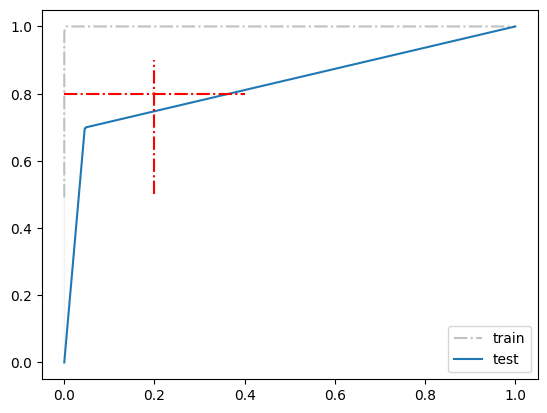

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(class_weight = 'balanced')

fitted_tree = dtree.fit(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_train)

tree_pred_tr = fitted_tree.predict_proba(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))
tree_pred_te = fitted_tree.predict_proba(X_test.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))

fprs1, tprs1, thresholds1 = roc_curve(y_train,tree_pred_tr[:,1])
fprs2, tprs2, thresholds2 = roc_curve(y_test,tree_pred_te[:,1])

sns.lineplot(x = fprs1, y = tprs1, linestyle = '-.', color = 'silver', label  = 'train')
sns.lineplot(x = fprs2, y = tprs2, label = 'test')
plt.vlines(x = [0.2], color = 'red', ymin = 0.5, ymax = 0.9,linestyle = '-.')
plt.hlines(y = [0.8], color = 'red', xmin = 0, xmax = 0.4, linestyle = '-.')



#### Random Forest

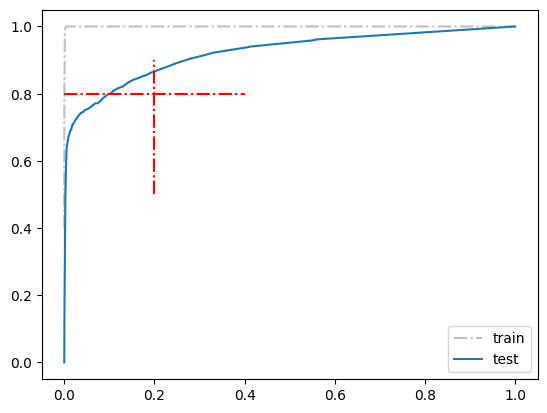

In [43]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(class_weight = 'balanced')

fitted_forest = forest.fit(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_train)

forest_pred_tr = fitted_forest.predict_proba(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))
forest_pred_te = fitted_forest.predict_proba(X_test.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))

fprs1, tprs1, thresholds1 = roc_curve(y_train,forest_pred_tr[:,1])
fprs2, tprs2, thresholds2 = roc_curve(y_test,forest_pred_te[:,1])

sns.lineplot(x = fprs1, y = tprs1, linestyle = '-.', color = 'silver', label  = 'train')
sns.lineplot(x = fprs2, y = tprs2, label = 'test')
plt.vlines(x = [0.2], color = 'red', ymin = 0.5, ymax = 0.9,linestyle = '-.')
plt.hlines(y = [0.8], color = 'red', xmin = 0, xmax = 0.4, linestyle = '-.')

In [44]:
fitted_forest = forest.fit(X.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y)
y_pred_forest = fitted_forest.predict_proba(df2.drop(columns = ['person_home_ownership_OTHER','person_age','loan_int_rate','loan_intent_HOMEIMPROVEMENT']))
submi = pd.DataFrame({'id':test_df['id'], 'loan_status':y_pred_forest[:,1]})
submi

# submi.to_csv('/workspaces/codespaces-jupyter/data/forest_submission.csv', index= False)

,id,loan_status
0,58645,0.92
1,58646,0.00
2,58647,0.61
3,58648,0.00
4,58649,0.07
...,...,...
39093,97738,0.04
39094,97739,0.00
39095,97740,0.02
39096,97741,0.21


#### Adaboost

/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


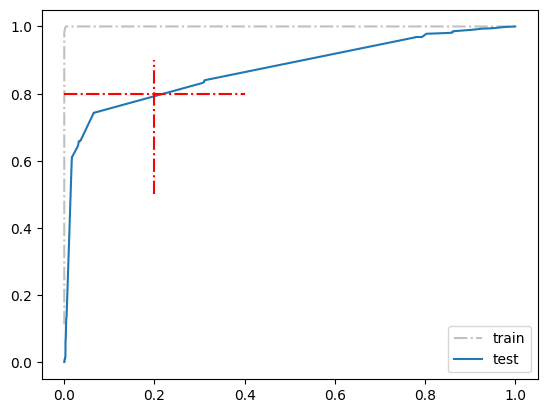

In [45]:
from sklearn.ensemble import AdaBoostClassifier

adabase = DecisionTreeClassifier(class_weight='balanced')
adabooster = AdaBoostClassifier(adabase)

fitted_ada = adabooster.fit(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_train)

ada_pred_tr = fitted_ada.predict_proba(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))
ada_pred_te = fitted_ada.predict_proba(X_test.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))

fprs1, tprs1, thresholds1 = roc_curve(y_train,ada_pred_tr[:,1])
fprs2, tprs2, thresholds2 = roc_curve(y_test,ada_pred_te[:,1])

sns.lineplot(x = fprs1, y = tprs1, linestyle = '-.', color = 'silver', label  = 'train')
sns.lineplot(x = fprs2, y = tprs2, label = 'test')
plt.vlines(x = [0.2], color = 'red', ymin = 0.5, ymax = 0.9,linestyle = '-.')
plt.hlines(y = [0.8], color = 'red', xmin = 0, xmax = 0.4, linestyle = '-.')

In [46]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer

roc_auc_socrer = make_scorer(roc_auc_score, needs_proba = True)

gscv = GridSearchCV(adabooster,param_grid= {'n_estimators':[25,50,75,100,150], 'learning_rate':[0.5,1]}, scoring= roc_auc_socrer)

gscv.fit(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_train)
gscv.cv_results_

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and

{'mean_fit_time': array([2.36699457, 3.21827879, 4.22224107, 5.18537626, 6.6770597 ,
        1.3464179 , 2.48652468, 3.52321234, 4.42230964, 6.69041448]),
 'std_fit_time': array([0.12929205, 0.11826513, 0.20622784, 0.27518662, 0.42196511,
        0.10192613, 0.31471621, 0.59367548, 0.56041141, 0.74405398]),
 'mean_score_time': array([0.03360186, 0.047754  , 0.06566973, 0.08020658, 0.10770802,
        0.02378659, 0.04488182, 0.05352092, 0.07194748, 0.10609894]),
 'std_score_time': array([0.00174858, 0.00113248, 0.00632906, 0.00428456, 0.00250458,
        0.00314938, 0.00808042, 0.00235744, 0.00379241, 0.00365013]),
 'param_learning_rate': masked_array(data=[0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=1e+20),
 'param_n_estimators': masked_array(data=[25, 50, 75, 100, 150, 25, 50, 75, 100, 150],
              mask=[False, False, False, False, False, Fals

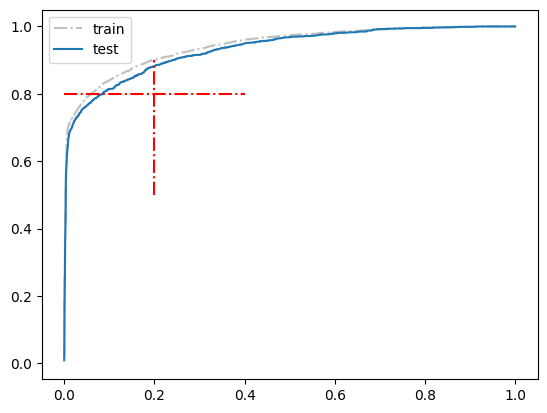

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gbooster = GradientBoostingClassifier()

fitted_gboost = gbooster.fit(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_train)

gboost_pred_tr = fitted_gboost.predict_proba(X_train.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))
gboost_pred_te = fitted_gboost.predict_proba(X_test.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))

fprs1, tprs1, thresholds1 = roc_curve(y_train,gboost_pred_tr[:,1])
fprs2, tprs2, thresholds2 = roc_curve(y_test,gboost_pred_te[:,1])

sns.lineplot(x = fprs1, y = tprs1, linestyle = '-.', color = 'silver', label  = 'train')
sns.lineplot(x = fprs2, y = tprs2, label = 'test')
plt.vlines(x = [0.2], color = 'red', ymin = 0.5, ymax = 0.9,linestyle = '-.')
plt.hlines(y = [0.8], color = 'red', xmin = 0, xmax = 0.4, linestyle = '-.')

Gboost on minority oversampleed dataset

In [48]:
print(f'minority - 1: {sum(y)}, prop: {(sum(y)/ len(y))*100:.2f}%')
print(f'majority - 0: {sum(y==0)}, prop: {(sum(y==0)/ len(y))*100:.2f}%')

minority - 1: 8350, prop: 14.24%
majority - 0: 50295, prop: 85.76%


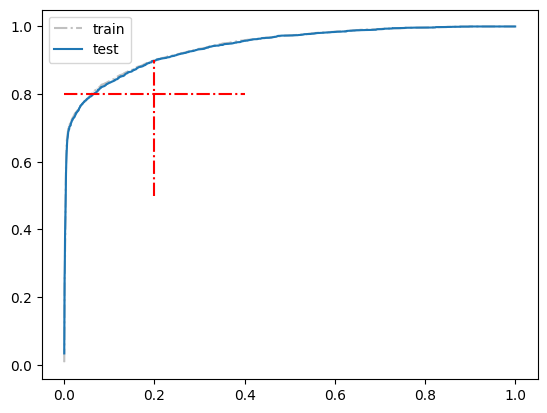

In [49]:
X_min_oversampled = pd.concat([X,X[y==1],X[y==1]])
y_min_oversaampled = pd.concat([y, y[y==1],y[y==1]])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_min_oversampled,y_min_oversaampled, test_size=0.2)

fitted_gboost2 = gbooster.fit(X_train2.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_train2)

gboost_pred_tr2 = fitted_gboost2.predict_proba(X_train2.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))
gboost_pred_te2 = fitted_gboost2.predict_proba(X_test2.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))

fprs1_o, tprs1_o, thresholds1_o = roc_curve(y_train2,gboost_pred_tr2[:,1])
fprs2_o, tprs2_o, thresholds2_o = roc_curve(y_test2,gboost_pred_te2[:,1])

sns.lineplot(x = fprs1_o, y = tprs1_o, linestyle = '-.', color = 'silver', label  = 'train')
sns.lineplot(x = fprs2_o, y = tprs2_o, label = 'test')
plt.vlines(x = [0.2], color = 'red', ymin = 0.5, ymax = 0.9,linestyle = '-.')
plt.hlines(y = [0.8], color = 'red', xmin = 0, xmax = 0.4, linestyle = '-.')



In [50]:
roc_auc_score(y_test,gboost_pred_te[:,1])

0.9332697457005996

In [51]:
roc_auc_score(y_test2,gboost_pred_te2[:,1])

0.9414730897464783

In [52]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer

roc_auc_socrer = make_scorer(roc_auc_score, needs_proba = True)

gscv = GridSearchCV(gbooster,param_grid= {'n_estimators':[50,100,150,200], 'learning_rate':[0.1,0.2,0.5]}, scoring= roc_auc_socrer)

gscv.fit(X_train2.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_train2)
gscv.cv_results_

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


{'mean_fit_time': array([1.80667224, 3.82314048, 5.49866815, 7.30977087, 1.80042796,
        3.71646528, 5.60548496, 7.20249758, 1.81001306, 3.86511197,
        5.5517487 , 7.15866575]),
 'std_fit_time': array([0.01572758, 0.10833293, 0.05047859, 0.16505489, 0.01587177,
        0.1530495 , 0.15496774, 0.06712548, 0.03063937, 0.09494899,
        0.11886033, 0.03298153]),
 'mean_score_time': array([0.01385541, 0.02107844, 0.02855544, 0.03410382, 0.01286936,
        0.0204875 , 0.02802114, 0.03246326, 0.01284199, 0.01872931,
        0.026792  , 0.03082623]),
 'std_score_time': array([0.00027641, 0.0005683 , 0.00210455, 0.00143   , 0.000102  ,
        0.00220067, 0.00137202, 0.00108553, 0.00089384, 0.00038452,
        0.00261367, 0.00141723]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5,
                    0.5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
 

Higher estimators and hgher learning rate seems to have improved performance

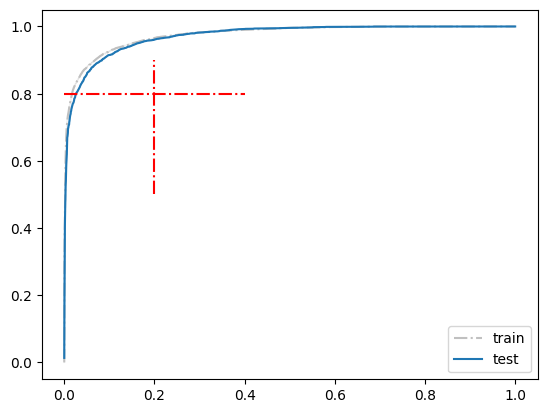

In [53]:
gbooster = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5)
fitted_gboost2 = gbooster.fit(X_train2.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_train2)

gboost_pred_tr2 = fitted_gboost2.predict_proba(X_train2.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))
gboost_pred_te2 = fitted_gboost2.predict_proba(X_test2.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']))

fprs1_o, tprs1_o, thresholds1_o = roc_curve(y_train2,gboost_pred_tr2[:,1])
fprs2_o, tprs2_o, thresholds2_o = roc_curve(y_test2,gboost_pred_te2[:,1])

sns.lineplot(x = fprs1_o, y = tprs1_o, linestyle = '-.', color = 'silver', label  = 'train')
sns.lineplot(x = fprs2_o, y = tprs2_o, label = 'test')
plt.vlines(x = [0.2], color = 'red', ymin = 0.5, ymax = 0.9,linestyle = '-.')
plt.hlines(y = [0.8], color = 'red', xmin = 0, xmax = 0.4, linestyle = '-.')


In [65]:
roc_auc_score(y_test2,gboost_pred_te2[:,1])

0.9714406449368796

In [102]:
X2 = X_min_oversampled#.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age'])
y2 = y_min_oversaampled
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.8)

In [57]:
fitted_gboost2 = gbooster.fit(X_min_oversampled.drop(columns = ['person_home_ownership_OTHER','loan_int_rate','loan_intent_HOMEIMPROVEMENT', 'person_age']),y_min_oversaampled)
y_pred_gboost2= fitted_gboost2.predict_proba(df2.drop(columns = ['person_home_ownership_OTHER','person_age','loan_int_rate','loan_intent_HOMEIMPROVEMENT']))
submi = pd.DataFrame({'id':test_df['id'], 'loan_status':y_pred_gboost2[:,1]})
submi

submi.to_csv('/workspaces/codespaces-jupyter/data/gboost+min_oversampled_submission.csv', index= False)

In [98]:
X2.shape[1]

19

#### How about a Neural Net

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Axes: >

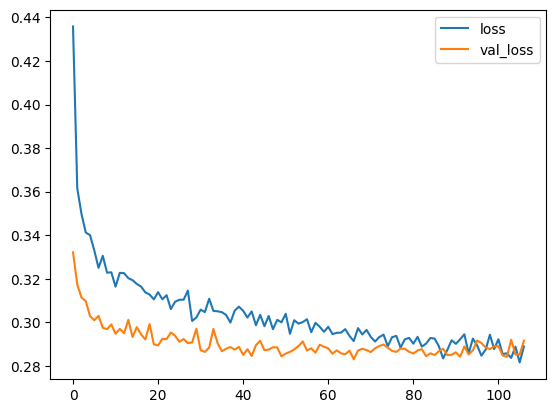

In [106]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

nnet_model = keras.Sequential([layers.BatchNormalization(input_shape = [17]),
                               layers.Dense(512, activation = 'relu'),
                               layers.BatchNormalization(),
                               layers.Dropout(0.3),
                               layers.Dense(256, activation = 'relu'),
                               layers.BatchNormalization(),
                               layers.Dropout(0.5),
                               layers.Dense(128, activation = 'relu'),
                               layers.BatchNormalization(), 
                               layers.Dropout(0.6),
                               layers.Dense(64, activation = 'relu'),
                               layers.BatchNormalization(),
                               layers.Dense(1, activation = 'sigmoid')]) #layers.Dropout(0.3),layers.Dense(512, activation = 'relu'),layers.BatchNormalization(),

nnet_model.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['AUC'])

early_stopping = EarlyStopping(min_delta = 0.001, patience = 40, restore_best_weights = True)

history = nnet_model.fit( X_train2, y_train2,
    validation_data=(X_test2, y_test2),
    batch_size=32,
    epochs=200,
    callbacks = [early_stopping],
    verbose=0)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

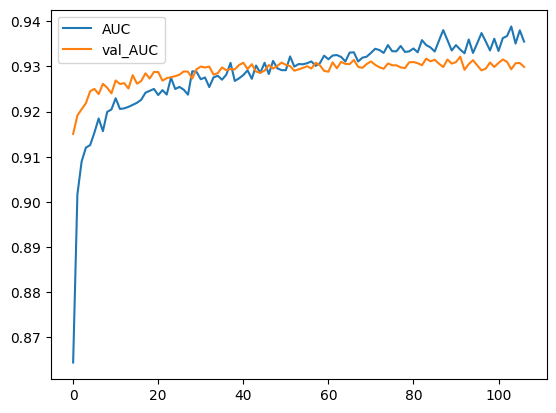

In [107]:
history_df.loc[:, ['AUC', 'val_AUC']].plot()

In [50]:
final_submission.to_csv('/workspaces/codespaces-jupyter/data/final_submission.csv', index= False)